# Bayesian Exploration
Here we demonstrate the use of Bayesian Exploration to characterize an unknown
function in the presence of constraints (see [here](https://www.nature.com/articles/s41467-021-25757-3)).
The function we wish to explore is the first objective of the TNK test problem.

## Specifiying generator options
We start with the generator defaults and modify as needed for conservative
exploration, which should prevent any constraint violations.

In [1]:
# set values if testing
import os
SMOKE_TEST = os.environ.get("SMOKE_TEST")
NUM_MC_SAMPLES = 1 if SMOKE_TEST else 128
NUM_RESTARTS = 1 if SMOKE_TEST else 20

# Ignore all warnings
import warnings
warnings.filterwarnings("ignore")

from copy import deepcopy
from xopt import Xopt, Evaluator
from xopt.generators.bayesian import BayesianExplorationGenerator
from xopt.resources.test_functions.tnk import evaluate_TNK, tnk_vocs

vocs = deepcopy(tnk_vocs)
vocs.objectives = {}
vocs.observables = ["y1"]

generator = BayesianExplorationGenerator(vocs=vocs)
generator.numerical_optimizer.n_restarts = NUM_RESTARTS
generator.numerical_optimizer.max_iter = 100
generator.n_monte_carlo_samples = NUM_MC_SAMPLES
generator.n_interpolate_points = 5

evaluator = Evaluator(function=evaluate_TNK)

X = Xopt(generator=generator, evaluator=evaluator, vocs=vocs)
X


            Xopt
________________________________
Version: 0+untagged.1.gb2f0be4
Data size: 0
Config as YAML:
dump_file: null
evaluator:
  function: xopt.resources.test_functions.tnk.evaluate_TNK
  function_kwargs:
    raise_probability: 0
    random_sleep: 0
    sleep: 0
  max_workers: 1
  vectorized: false
generator:
  computation_time: null
  fixed_features: null
  gp_constructor:
    covar_modules: {}
    mean_modules: {}
    name: standard
    trainable_mean_keys: []
    transform_inputs: true
    use_low_noise_prior: true
  log_transform_acquisition_function: false
  max_travel_distances: null
  model: null
  n_candidates: 1
  n_interpolate_points: 5
  n_monte_carlo_samples: 128
  name: bayesian_exploration
  numerical_optimizer:
    max_iter: 100
    max_time: null
    n_restarts: 20
    name: LBFGS
  supports_batch_generation: true
  turbo_controller: null
  use_cuda: false
max_evaluations: null
serialize_inline: false
serialize_torch: false
strict: true
vocs:
  constants:
   

## Run exploration
We start with evaluating 2 points that we know satisfy the constraints. We then run
30 exploration steps.

In [2]:
X.evaluate_data({"x1":[1.0, 0.75],"x2":[0.7, 0.95]})

,x1,x2,a,y1,y2,c1,c2,xopt_runtime,xopt_error
0,1.00,0.70,dummy_constant,1.00,0.70,0.584045,0.290,0.000034,False
1,0.75,0.95,dummy_constant,0.75,0.95,0.494833,0.265,0.000008,False


In [3]:
for i in range(20):
    print(f"step {i}")
    X.step()

step 0


step 1


step 2


step 3


step 4


step 5


step 6


step 7


step 8


step 9


step 10


step 11


step 12


step 13


step 14


step 15


step 16


step 17


step 18


step 19


In [4]:
# view the data
X.data

,x1,x2,a,y1,y2,c1,c2,xopt_runtime,xopt_error
0,1.000000,0.700000,dummy_constant,1.000000,0.700000,0.584045,0.290000,0.000034,False
1,0.750000,0.950000,dummy_constant,0.750000,0.950000,0.494833,0.265000,0.000008,False
2,1.228318,1.388318,dummy_constant,1.228318,1.388318,2.380252,1.319556,0.000023,False
3,1.706636,1.826636,dummy_constant,1.706636,1.826636,5.163599,3.215934,0.000008,False
4,2.184954,2.264954,dummy_constant,2.184954,2.264954,8.808148,5.954133,0.000006,False
...,...,...,...,...,...,...,...,...,...
97,0.845145,0.902269,dummy_constant,0.845145,0.902269,0.441719,0.280945,0.000024,False
98,0.747910,0.974013,dummy_constant,0.747910,0.974013,0.557602,0.286148,0.000008,False
99,0.650675,1.045758,dummy_constant,0.650675,1.045758,0.603800,0.320555,0.000006,False
100,0.553440,1.117503,dummy_constant,0.553440,1.117503,0.507467,0.384166,0.000006,False


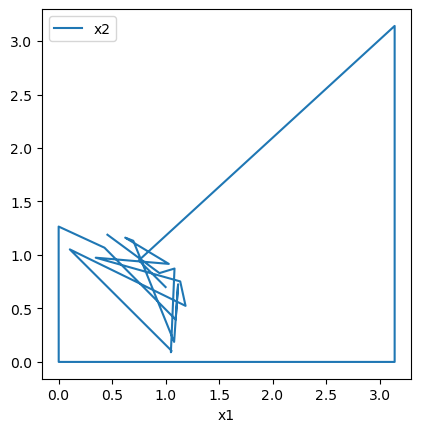

In [5]:
# plot results
ax = X.data.plot("x1", "x2")
ax.set_aspect("equal")

## Introspect models, acquisition function and feasibility prediction
During exploration we generate Gaussian Process models of each objective and
constraint. We demonstrate how they are viewed below.

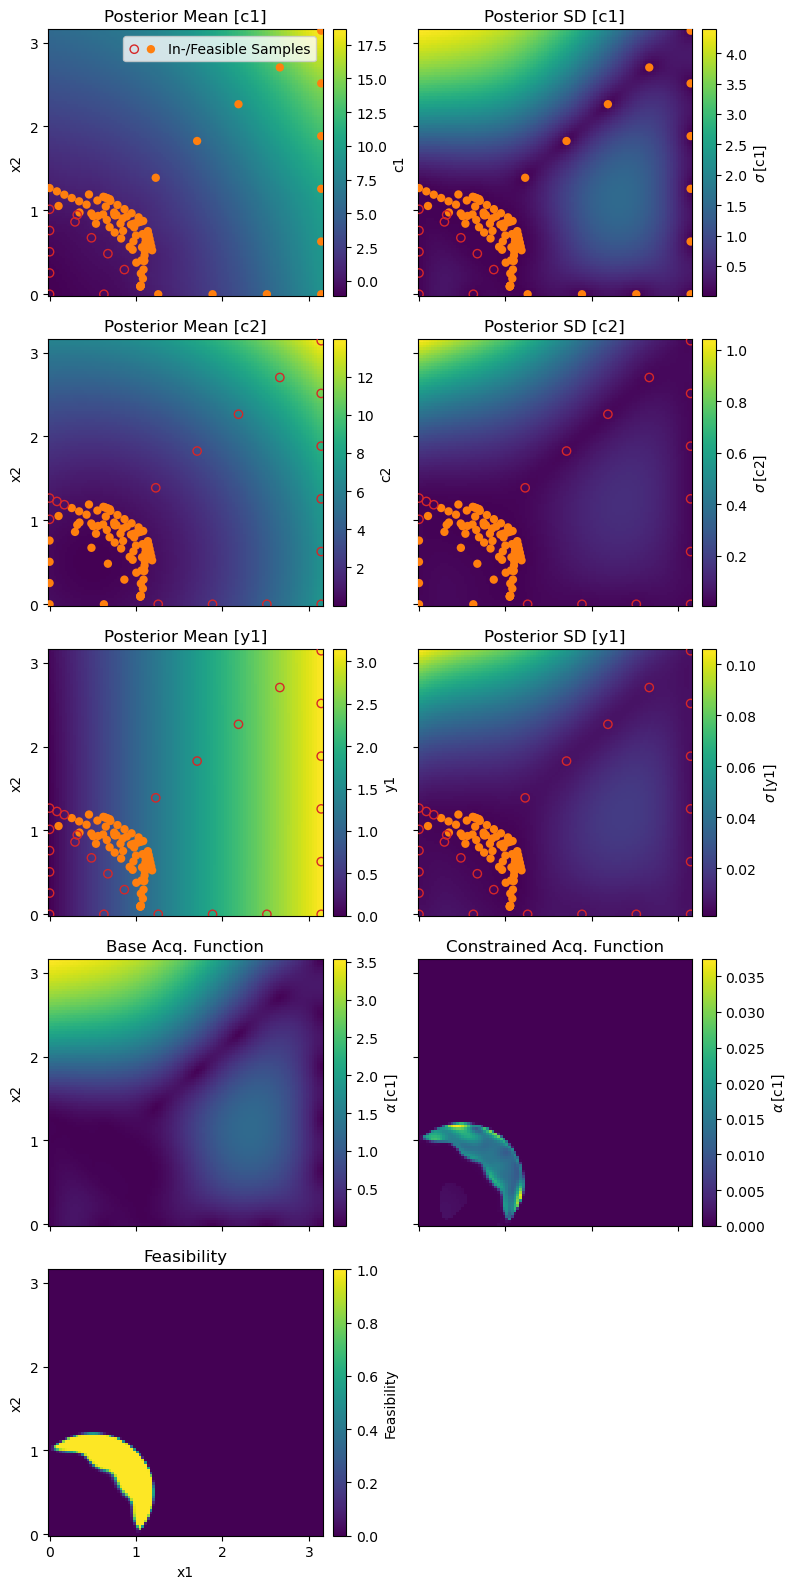

In [6]:
fig, ax = X.generator.visualize_model(show_feasibility=True, n_grid=100)

## Generator model hyperparameters

In [7]:
# print generator model hyperparameters
for name, val in X.generator.model.named_parameters():
    print(f"{name}:{val}")

X.generator.model.models[2].covar_module.base_kernel.lengthscale

models.0.likelihood.noise_covar.raw_noise:Parameter containing:
tensor([-25.7662], dtype=torch.float64, requires_grad=True)
models.0.mean_module.raw_constant:Parameter containing:
tensor(1.7951, dtype=torch.float64, requires_grad=True)
models.0.covar_module.raw_outputscale:Parameter containing:
tensor(2.3259, dtype=torch.float64, requires_grad=True)
models.0.covar_module.base_kernel.raw_lengthscale:Parameter containing:
tensor([[-0.4414, -0.4703]], dtype=torch.float64, requires_grad=True)
models.1.likelihood.noise_covar.raw_noise:Parameter containing:
tensor([-22.2949], dtype=torch.float64, requires_grad=True)
models.1.mean_module.raw_constant:Parameter containing:
tensor(7.4642, dtype=torch.float64, requires_grad=True)
models.1.covar_module.raw_outputscale:Parameter containing:
tensor(8.1771, dtype=torch.float64, requires_grad=True)
models.1.covar_module.base_kernel.raw_lengthscale:Parameter containing:
tensor([[1.5247, 1.6073]], dtype=torch.float64, requires_grad=True)
models.2.likel

tensor([[1.5390, 2.7795]], dtype=torch.float64, grad_fn=<SoftplusBackward0>)

## Examine the number of constraint violations
Using the convience function provided by the vocs object we can evaluate which
samples violate either or both of our constraints.

In [8]:
X.vocs.feasibility_data(X.data)

,feasible_c1,feasible_c2,feasible
0,True,True,True
1,True,True,True
2,True,False,False
3,True,False,False
4,True,False,False
...,...,...,...
97,True,True,True
98,True,True,True
99,True,True,True
100,True,True,True


In [9]:
# generate next point
X.generator.generate(1)

[{'x1': 0.5361296414712939, 'x2': 1.0584129198338617},
 {'x1': 0.6160540798852123, 'x2': 0.9275780696545605},
 {'x1': 0.6959785182991307, 'x2': 0.7967432194752593},
 {'x1': 0.7759029567130491, 'x2': 0.6659083692959582},
 {'x1': 0.8558273951269675, 'x2': 0.5350735191166571}]